In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    # Clone the entire repo to access the files.
    !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
    %cd cloned-repo/labs/ex04/template/

from helpers import *
%load_ext autoreload
%autoreload 2

# Random Walks

In this exercise you will implement a simple random walk on a torus graph and will check its convergence to uniform distribution.

Torus is a 2D-grid graph and looks like a 'doughnout', as shown in the picture below. 
<img src="https://github.com/epfml/OptML_course/blob/2ff8711feb70637d0d0f9ac75ec6164c7659c1f5/labs/ex04/template/torus_topology.png?raw=true" alt="Drawing" style="width: 200px;"/>

**Note:** We will use the networkx library to generate our graph. You can install this using

```bash
    pip3 install --upgrade --user networkx
```

Let's generate the probability matrix $\mathbf{G}$ of a torus graph of size $4\times 4$, note that we include self-loops too. You can play around with the code in the helpers.py to generate different graphs.

In [23]:
n_nodes = 25
A = generate_torus_adj_matrix(n_nodes)
degree = 5 # fill in here the degree of a node in the graph
G = A/degree

Lets generate initial probabitily distribution. Recall that our walk always starts from the node 1.

In [24]:
x_init = np.zeros(n_nodes) # fill in here
x_init[0]=1


As you will prove in Q2, probability distribution at each step evolves as $x_{t + 1} = G x_{t}$. 

In [25]:
def random_walk(G, x_init, num_iter):
    ''' Computes probability distribution of random walk after
        num_iter steps.
        Output: 
        x: final estimate of probability distribution after
            num_iter steps
        errors: array of differences ||x_{t} - mu||_2^2, where
            mu is uniform distribution
    '''
    x = np.copy(x_init)
    errors = np.zeros(num_iter)
    mu = np.ones_like(x) / n_nodes
    for t in range(0, num_iter):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: simulate probability distribution in random walk
        # ***************************************************
        x = G@x
        error = np.linalg.norm(x - mu)**2
        errors[t]=error
        
        
    return x, errors

Lets run our algorithm for 50 iterations and see at the final probability distribution.

Text(0, 0.5, 'probability')

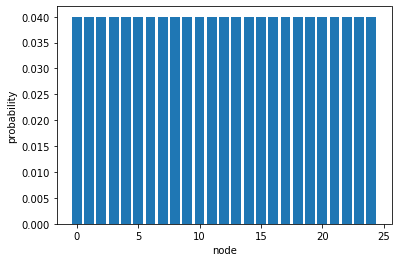

In [26]:
x, errors = random_walk(G, x_init, num_iter=50)
plt.bar(np.arange(len(x)), x)
plt.xlabel("node")
plt.ylabel("probability")

We see that the final disctribution is indeed uniform. Lets now plot how fast did the algorithm converge. We will use logarithmic scale on y-axis to be able to distinguish between sublinear and linear rates.

Text(0, 0.5, '$||x_{t} - mu||_2^2$')

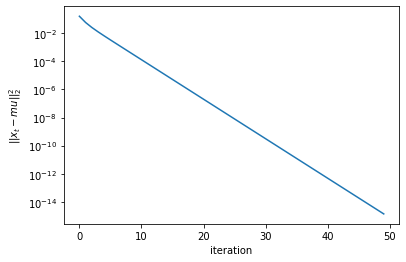

In [27]:
plt.semilogy(errors)
plt.xlabel("iteration")
plt.ylabel("$||x_{t} - mu||_2^2$")